# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.prepare_data import prepare_modeling_data
from src.config import FileArgs
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
%load_ext autoreload
%autoreload 

# Load Data

In [3]:
cus_file = "dataset/customers_(4).csv"
noncus_file = "dataset/noncustomers_(4).csv"
usage_file = "dataset/usage_actions_(4).csv"

args = FileArgs(customers_path=cus_file,
                non_customers_path=noncus_file,
                usage_path=usage_file)
modeling_data = prepare_modeling_data(args, modeling=False)

In [10]:
customers_df = pd.read_csv(args.customers_path) # customer data
customers_df.head()

,CLOSEDATE,MRR,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id
0,2019-06-20,290.00,309343,201 to 1000,Other,199
1,2019-03-22,392.54,16000001,51 to 200,NaN,147
2,2020-01-08,-61.15,60502,1001 to 10000,HIGHER_EDUCATION,118
3,2019-09-19,400.00,3575321,201 to 1000,CONSUMER_SERVICES,126
4,2019-01-27,209.98,273063,26 to 50,Technology - Software,174


In [11]:
print(f"Number of Unique Customers in the customer data: {customers_df['id'].nunique()}")

Number of Unique Customers in the customer data: 200


In [4]:
print(f"Number of Unique IDs in the modeling data: {modeling_data['id'].nunique()}")

Number of Unique IDs in the modeling data: 185


In [5]:
print(f"Modeling Data Shape: {modeling_data.shape}")

Modeling Data Shape: (2869, 38)


In [6]:
modeling_data.head()

,WHEN_TIMESTAMP,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,CLOSEDATE,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,DAYS_DIFF,WILL_CONVERT,CUMULATIVE_ACTIONS_CONTACTS,CUMULATIVE_ACTIONS_COMPANIES,CUMULATIVE_ACTIONS_DEALS,CUMULATIVE_ACTIONS_EMAILS,CUMULATIVE_USERS_CONTACTS,CUMULATIVE_USERS_COMPANIES,CUMULATIVE_USERS_DEALS,CUMULATIVE_USERS_EMAILS,TOTAL_ACTIONS,TOTAL_USERS,TOTAL_CUM_ACTIONS,TOTAL_CUM_USERS,CONTACTS_CUM_GROWTH,DEALS_CUM_GROWTH,COMPANIES_CUM_GROWTH,TOTAL_CUM_GROWTH,ALEXA_RANK_CLEAN,ALEXA_RANK_LOG,DAY,MONTH,YEAR,EMPLOYEE_RANGE_MAPPED
0,2019-01-07,46,1,2,6,3,1,1,1,1,2019-01-30,2610402,2 to 5,RENEWABLES_ENVIRONMENT,23,1,46,1,2,6,3,1,1,1,55,6,55,6,1.000000,1.000000,1.000000,1.000000,2610402,14.775015,7,1,2019,2
1,2019-01-14,213,10,74,10,2,2,2,1,1,2019-01-30,2610402,2 to 5,RENEWABLES_ENVIRONMENT,16,1,259,11,76,16,5,3,3,2,307,7,362,13,5.630435,38.000000,11.000000,6.581818,2610402,14.775015,14,1,2019,2
2,2019-01-21,138,4,45,5,2,2,2,1,1,2019-01-30,2610402,2 to 5,RENEWABLES_ENVIRONMENT,9,1,397,15,121,21,7,5,5,3,192,7,554,20,1.532819,1.592105,1.363636,1.530387,2610402,14.775015,21,1,2019,2
3,2019-01-28,208,61,87,7,4,2,3,1,1,2019-01-30,2610402,2 to 5,RENEWABLES_ENVIRONMENT,2,1,605,76,208,28,11,7,8,4,363,10,917,30,1.523929,1.719008,5.066667,1.655235,2610402,14.775015,28,1,2019,2
4,2019-01-07,113,0,17,0,3,0,3,0,2,2019-04-23,5516811,2 to 5,SaaS,106,0,113,0,17,0,3,0,3,0,130,6,130,6,1.000000,1.000000,1.000000,1.000000,5516811,15.523311,7,1,2019,2


In [8]:
modeling_data2 = modeling_data.copy()

# EDA

2025-10-02 20:01:05,314 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-02 20:01:05,327 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


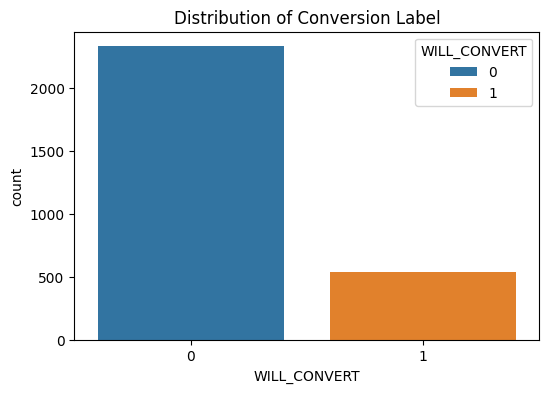

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='WILL_CONVERT', data=modeling_data2, hue="WILL_CONVERT")
plt.title("Distribution of Conversion Label")
plt.show()

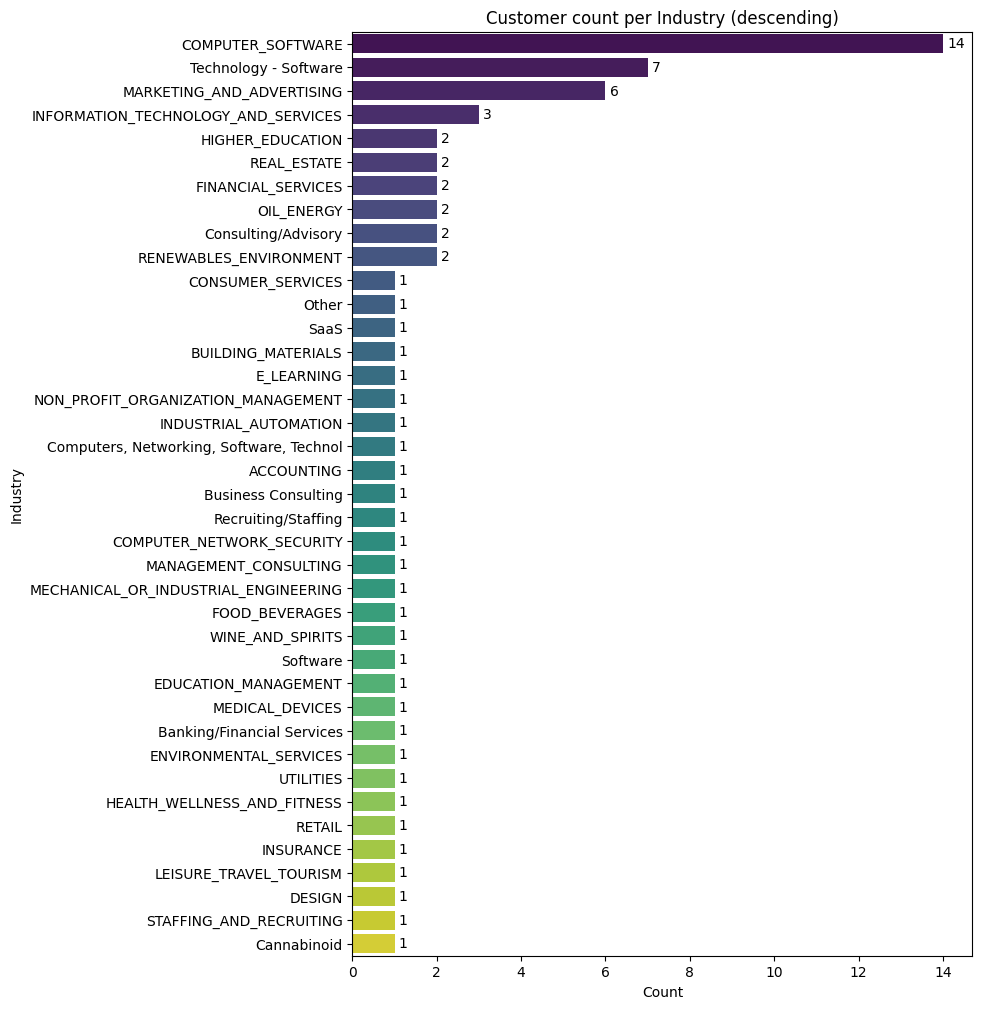

In [12]:
industry_order = customers_df['INDUSTRY'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='INDUSTRY', data=customers_df, order=industry_order, palette="viridis")

# Add counts on the bars
for p in ax.patches:
    width = p.get_width()  # horizontal bar, width is the count
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, int(width),
            va='center', ha='left', fontsize=10)

plt.title("Customer count per Industry (descending)")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

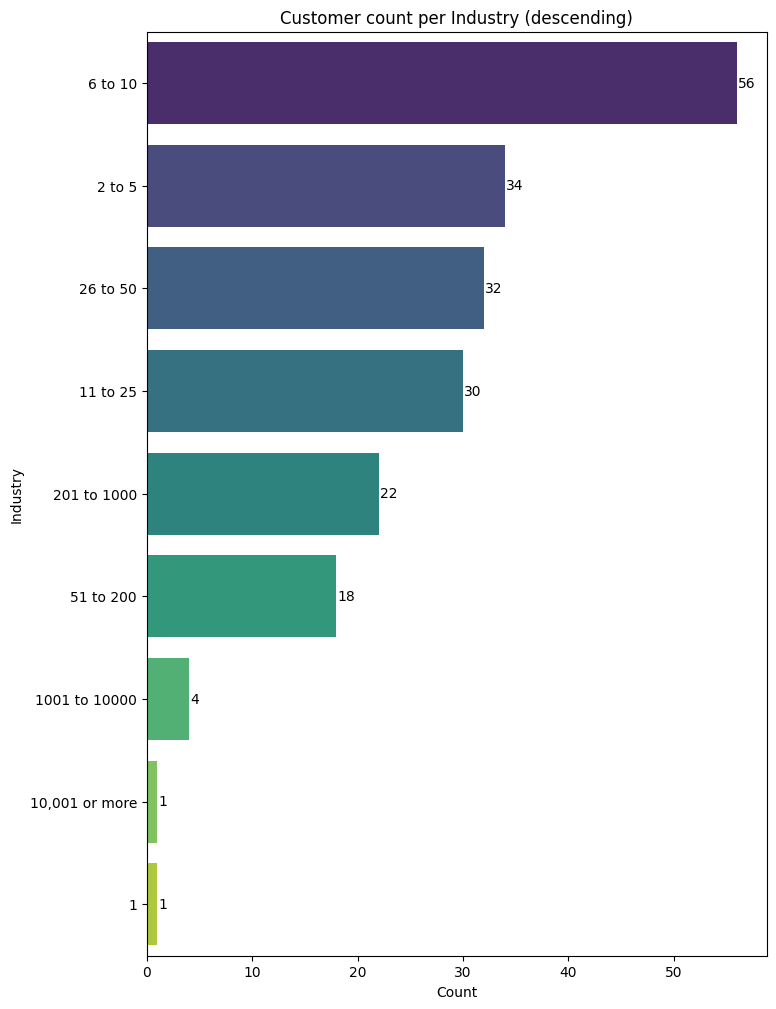

In [13]:
emp_range_order = customers_df['EMPLOYEE_RANGE'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='EMPLOYEE_RANGE', data=customers_df, order=emp_range_order, palette="viridis")

# Add counts on the bars
for p in ax.patches:
    width = p.get_width()  # horizontal bar, width is the count
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, int(width),
            va='center', ha='left', fontsize=10)

plt.title("Customer count per Industry (descending)")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

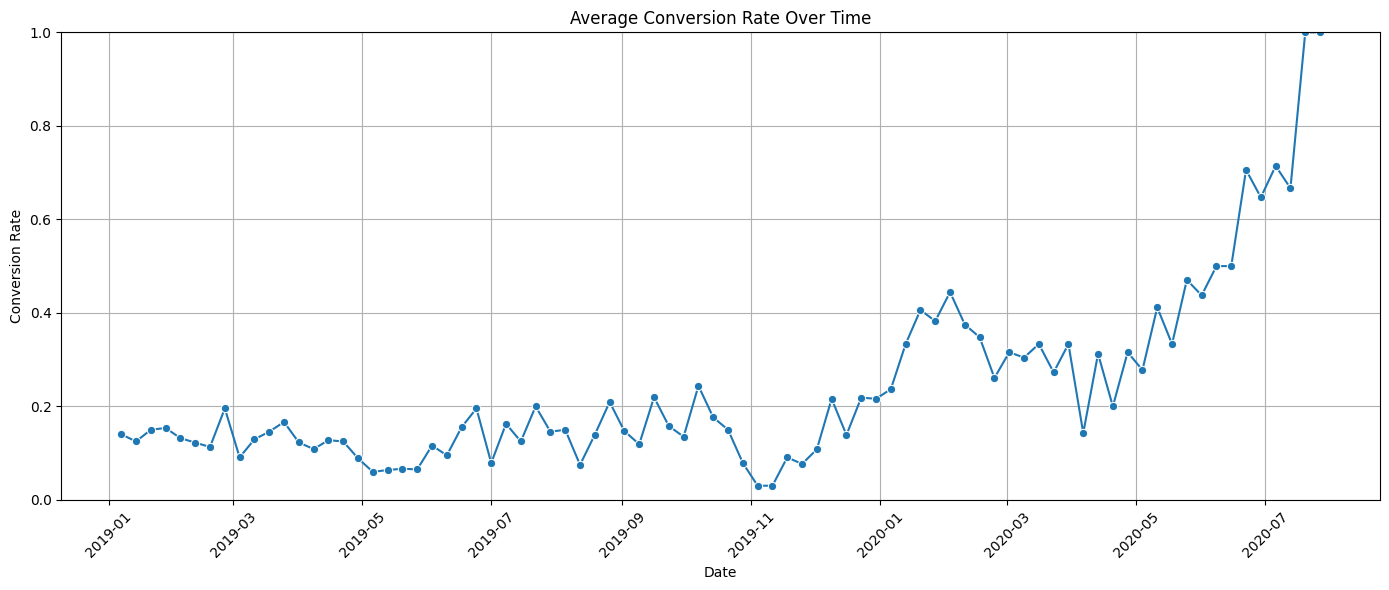

In [14]:
# Aggregate conversion rate per day
daily_conv = modeling_data2.groupby(
    modeling_data2['WHEN_TIMESTAMP'].dt.date
)['WILL_CONVERT'].mean()

plt.figure(figsize=(14,6))
sns.lineplot(x=daily_conv.index, y=daily_conv.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.title("Average Conversion Rate Over Time")
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [15]:
print(f"Data available from {modeling_data2['WHEN_TIMESTAMP'].min()} to {modeling_data2['WHEN_TIMESTAMP'].max()}")

Data available from 2019-01-07 00:00:00 to 2020-07-27 00:00:00


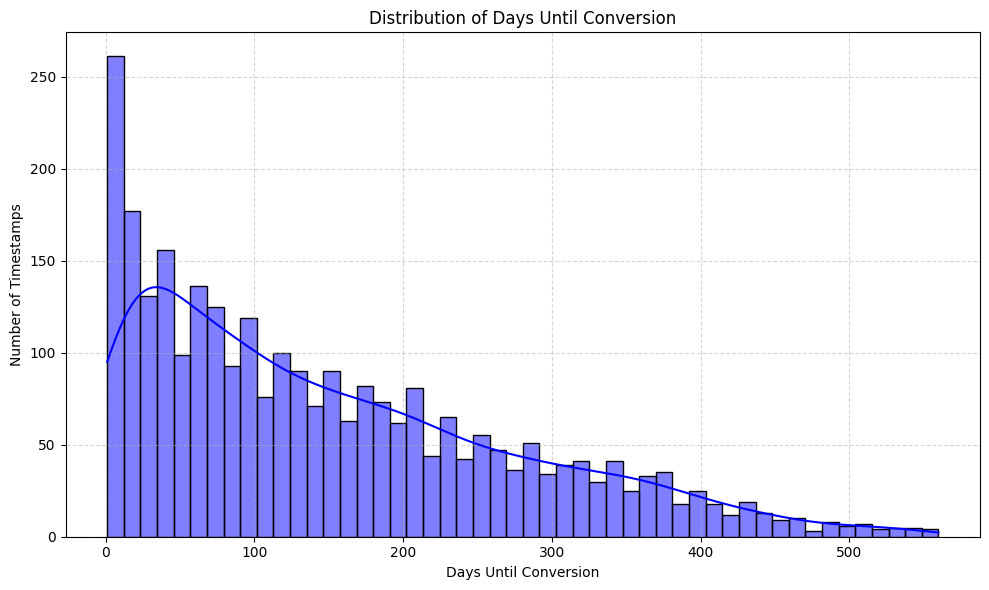

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(modeling_data2['DAYS_DIFF'], bins=50, kde=True, color='blue', edgecolor='black')
plt.xlabel("Days Until Conversion")
plt.ylabel("Number of Timestamps")
plt.title("Distribution of Days Until Conversion")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

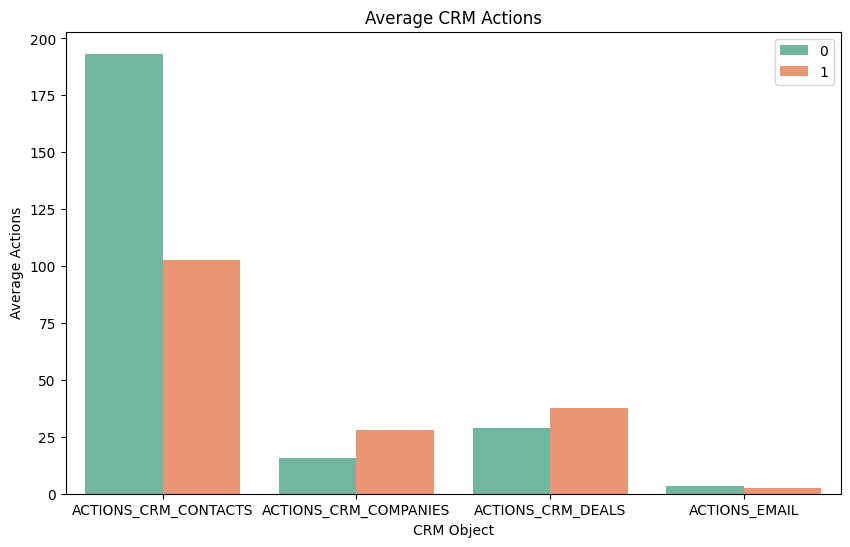

In [17]:
# Compute mean usage per object by conversion label
usage_means_actions = modeling_data2.groupby('WILL_CONVERT')[[
    'ACTIONS_CRM_CONTACTS','ACTIONS_CRM_COMPANIES','ACTIONS_CRM_DEALS','ACTIONS_EMAIL'
]].mean().reset_index()

# Melt the DataFrame to long format for Seaborn
usage_melted = usage_means_actions.melt(id_vars='WILL_CONVERT', 
                                var_name='CRM_Object', 
                                value_name='Average_Actions')

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x='CRM_Object', 
    y='Average_Actions', 
    hue='WILL_CONVERT', 
    data=usage_melted, 
    palette='Set2'
)

plt.title("Average CRM Actions")
plt.xlabel("CRM Object")
plt.ylabel("Average Actions")
plt.legend()
plt.show()

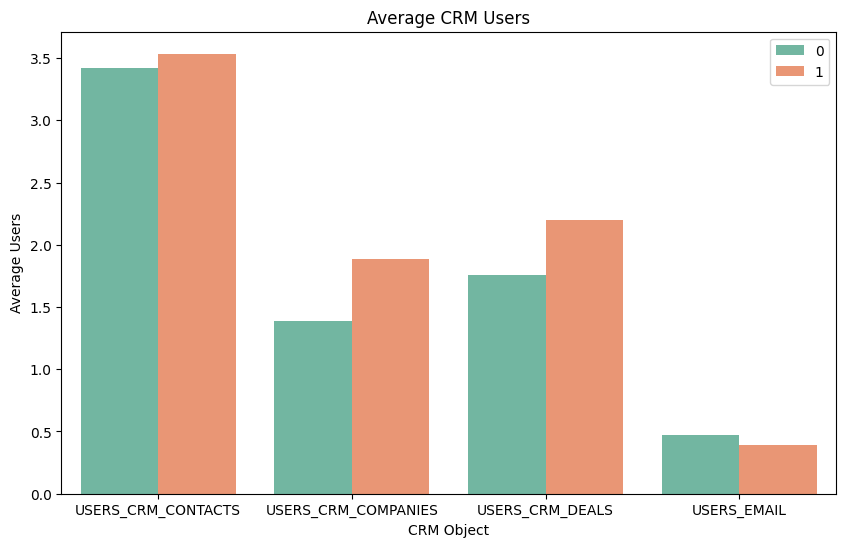

In [19]:
# Compute mean usage per object by conversion label
usage_means_users = modeling_data2.groupby('WILL_CONVERT')[[
    'USERS_CRM_CONTACTS','USERS_CRM_COMPANIES','USERS_CRM_DEALS','USERS_EMAIL'
]].mean().reset_index()

# Melt the DataFrame to long format for Seaborn
usage_melted = usage_means_users.melt(id_vars='WILL_CONVERT', 
                                var_name='CRM_Object', 
                                value_name='Average_Actions')

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x='CRM_Object', 
    y='Average_Actions', 
    hue='WILL_CONVERT', 
    data=usage_melted, 
    palette='Set2'
)

plt.title("Average CRM Users")
plt.xlabel("CRM Object")
plt.ylabel("Average Users")
plt.legend()
plt.show()

USERS_CRM_CONTACTS = 3.8 for converters → on average, 3.8 users per portal were active on Contacts for portals that eventually converted.

USERS_EMAIL = 2.0 for non-converters → on average, only 2 users per portal sent emails in non-converting companies.

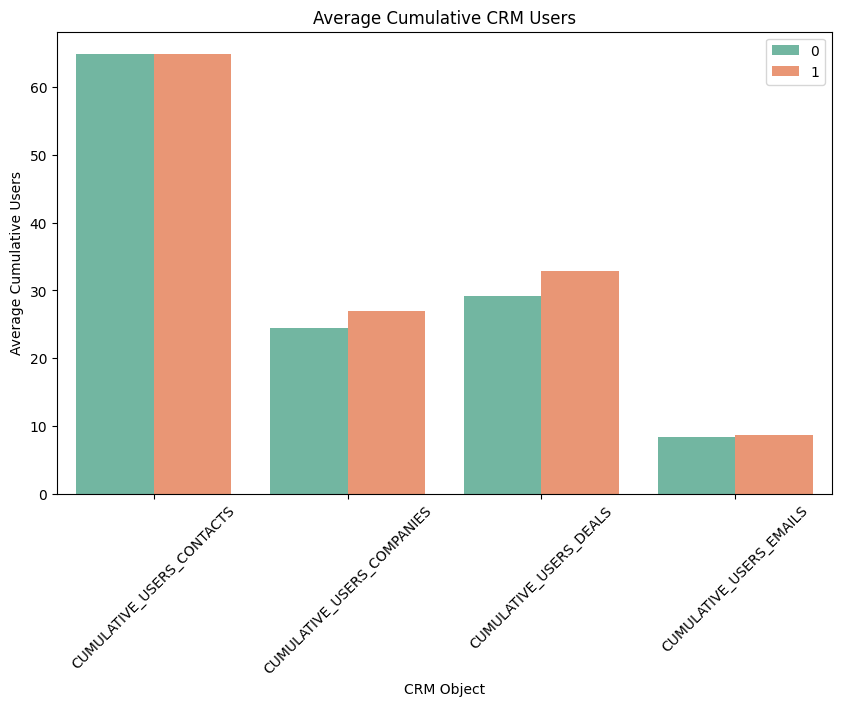

In [20]:
# Compute mean usage per object by conversion label
usage_means_cum_users = modeling_data2.groupby('WILL_CONVERT')[[
    'CUMULATIVE_USERS_CONTACTS','CUMULATIVE_USERS_COMPANIES','CUMULATIVE_USERS_DEALS','CUMULATIVE_USERS_EMAILS'
]].mean().reset_index()

# Melt the DataFrame to long format for Seaborn
usage_cum_users_melted = usage_means_cum_users.melt(id_vars='WILL_CONVERT', 
                                var_name='CRM_Object', 
                                value_name='Average_Actions')

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x='CRM_Object', 
    y='Average_Actions', 
    hue='WILL_CONVERT', 
    data=usage_cum_users_melted, 
    palette='Set2'
)

plt.title("Average Cumulative CRM Users")
plt.xlabel("CRM Object")
plt.xticks(rotation=45)
plt.ylabel("Average Cumulative Users")
plt.legend()
plt.show()

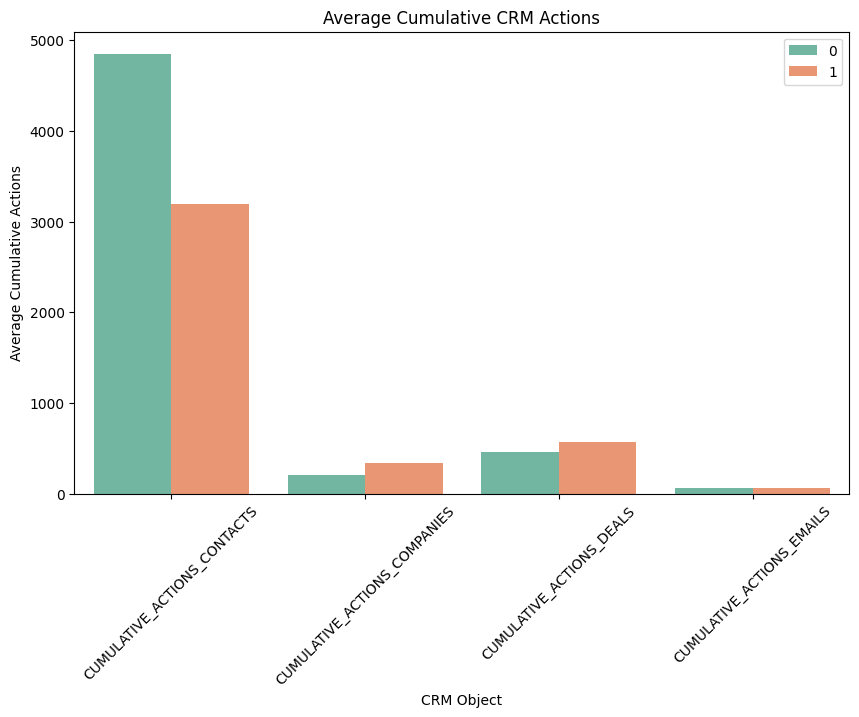

In [21]:
# Compute mean usage per object by conversion label
usage_means_cum_actions = modeling_data2.groupby('WILL_CONVERT')[[
    'CUMULATIVE_ACTIONS_CONTACTS','CUMULATIVE_ACTIONS_COMPANIES','CUMULATIVE_ACTIONS_DEALS','CUMULATIVE_ACTIONS_EMAILS'
]].mean().reset_index()

# Melt the DataFrame to long format for Seaborn
usage_cum_melted = usage_means_cum_actions.melt(id_vars='WILL_CONVERT', 
                                var_name='CRM_Object', 
                                value_name='Average_Actions')

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(
    x='CRM_Object', 
    y='Average_Actions', 
    hue='WILL_CONVERT', 
    data=usage_cum_melted, 
    palette='Set2'
)

plt.title("Average Cumulative CRM Actions")
plt.xlabel("CRM Object")
plt.xticks(rotation=45)
plt.ylabel("Average Cumulative Actions")
plt.legend()
plt.show()

## Outliers

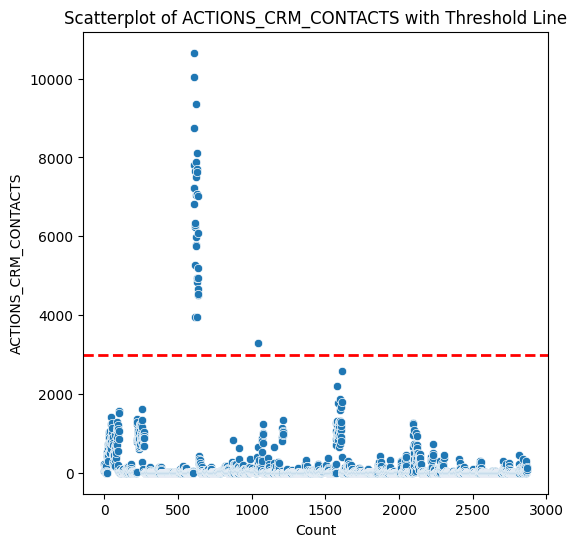

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(modeling_data2["ACTIONS_CRM_CONTACTS"])
plt.axhline(y=3000, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of ACTIONS_CRM_CONTACTS with Threshold Line")
plt.xlabel("Count")
plt.ylabel("ACTIONS_CRM_CONTACTS")
plt.show()

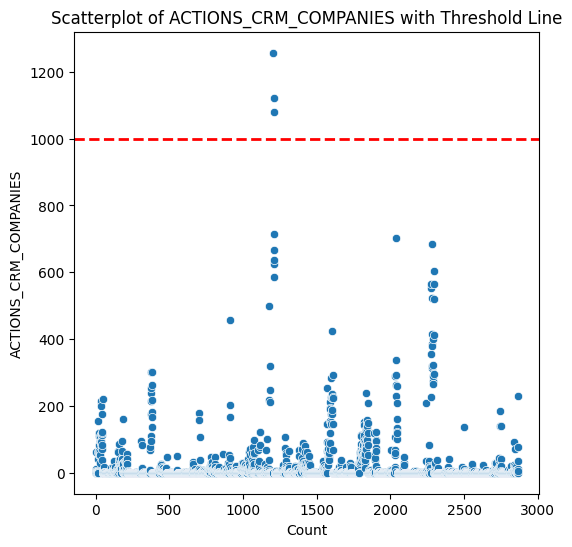

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(modeling_data2["ACTIONS_CRM_COMPANIES"])
plt.axhline(y=1000, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of ACTIONS_CRM_COMPANIES with Threshold Line")
plt.xlabel("Count")
plt.ylabel("ACTIONS_CRM_COMPANIES")
plt.show()

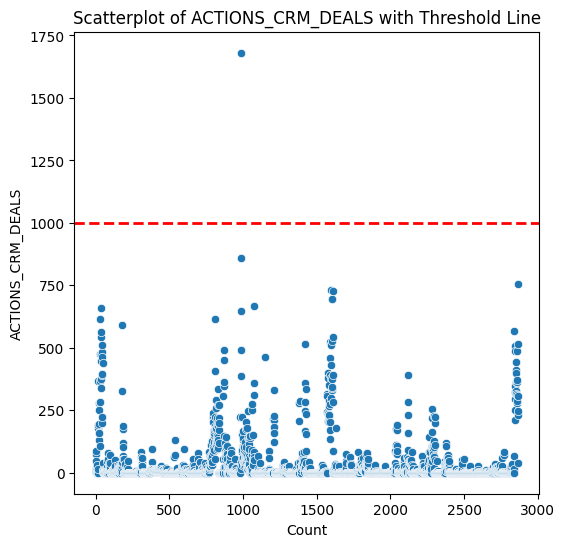

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(modeling_data2["ACTIONS_CRM_DEALS"])
plt.axhline(y=1000, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of ACTIONS_CRM_DEALS with Threshold Line")
plt.xlabel("Count")
plt.ylabel("ACTIONS_CRM_DEALS")
plt.show()

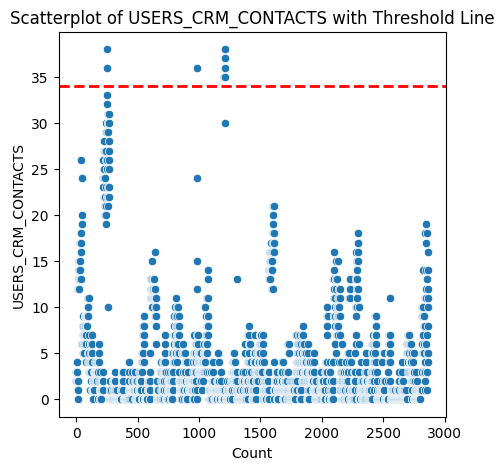

In [25]:
plt.figure(figsize=(5,5))

# Scatterplot: values vs index
sns.scatterplot(modeling_data2["USERS_CRM_CONTACTS"])

# Add red horizontal line at y=30
plt.axhline(y=34, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of USERS_CRM_CONTACTS with Threshold Line")
plt.xlabel("Count")
plt.ylabel("USERS_CRM_CONTACTS")
plt.show()

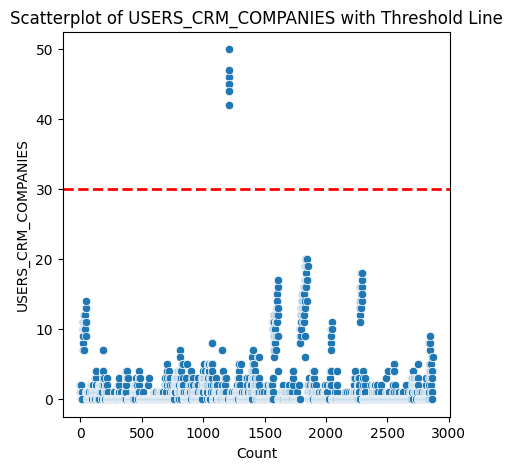

In [26]:
plt.figure(figsize=(5,5))

# Scatterplot: values vs index
sns.scatterplot(modeling_data2["USERS_CRM_COMPANIES"])

# Add red horizontal line at y=30
plt.axhline(y=30, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of USERS_CRM_COMPANIES with Threshold Line")
plt.xlabel("Count")
plt.ylabel("USERS_CRM_COMPANIES")
plt.show()

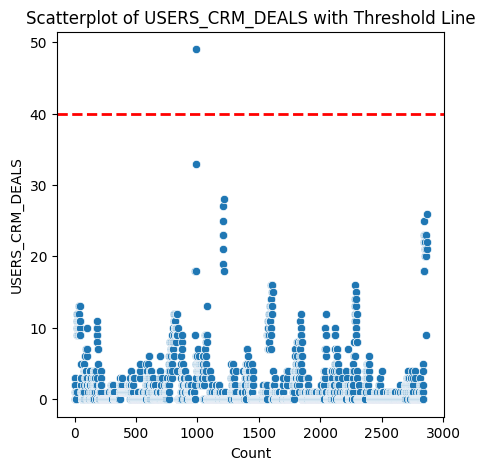

In [27]:
plt.figure(figsize=(5,5))

# Scatterplot: values vs index
sns.scatterplot(modeling_data2["USERS_CRM_DEALS"])

# Add red horizontal line at y=30
plt.axhline(y=40, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of USERS_CRM_DEALS with Threshold Line")
plt.xlabel("Count")
plt.ylabel("USERS_CRM_DEALS")
plt.show()

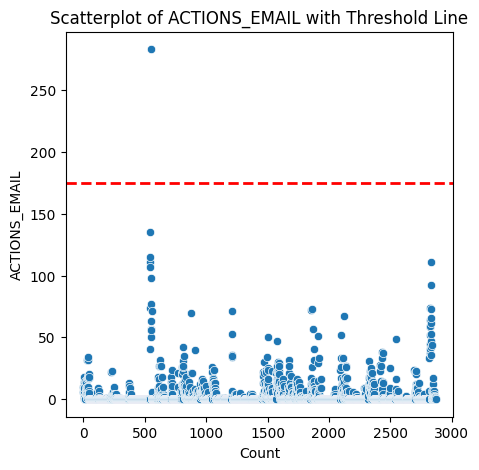

In [28]:
plt.figure(figsize=(5,5))

# Scatterplot: values vs index
sns.scatterplot(modeling_data2["ACTIONS_EMAIL"])

# Add red horizontal line at y=30
plt.axhline(y=175, color="red", linestyle="--", linewidth=2)

plt.title("Scatterplot of ACTIONS_EMAIL with Threshold Line")
plt.xlabel("Count")
plt.ylabel("ACTIONS_EMAIL")
plt.show()